In [106]:
# V1
import matplotlib.pyplot as plt 
import numpy as np
import re


width = list()
height = list()
label = list()
wh = list()

creature = dict()

# Reads the file line by line, and sorts the data in to three lists
# Enumerate is used to skip the first Header row in the txt file
with open("datapoints.txt", "r") as file:
    
    for n, e in enumerate(file.readlines()):
        if n == 0:
            continue
        line = e.split(", ")
        width.append(round(float(line[0]), 2))
        height.append(round(float(line[1]), 2))
        label.append(int(line[2][:-1]))
        #wh.append( (float(line[0]), float(line[1])) )
    """
    for n, e in enumerate(file.readlines()):
        if n == 0:
            continue
        line = e.split(", ")
        creature[n-1] = { 
            "width":round(float(line[0]), 2),
            "height":round(float(line[1]), 2),
            "label":int(line[2][:-1])
            }
    """

#wh = np.array(wh)
w = np.array(width)
h = np.array(height)
euclidean_distance = np.sqrt(w**2+h**2)

pichu = list()
pikachu = list()
for i in range(len(euclidean_distance)):
    if label[i] :
        pikachu.append(euclidean_distance[i])
    else:
        pichu.append(euclidean_distance[i])
pichu = round( np.average(np.array(pichu)), 2)
pikachu = round( np.average(np.array(pikachu)), 2 )
median = (pichu+pikachu)/2 
print(f"pichu {pichu}")
print(f"pikachu {pikachu}")

def test():
    with open("testpoints.txt", "r") as file:
        return [ "pickachu" if round(np.sqrt(float(re.search(r"\((.*), (.*)\)",e)[1])**2 +float(re.search(r"\((.*), (.*)\)",e)[2])**2), 2) >= median else "pichu"  for i, e in enumerate(file.readlines()) if i != 0] 
        

print("test")
print(test())

print(wh[:10])
print("euclidean_distance")
print(euclidean_distance[:10])
print("w")
print(w[:10])
print("h")
print(h[:10])
print(f"ED: {np.sqrt(w[0]**2+h[0]**2)} ")




print(label[:10])
print(height[:10])
print(width[:10])



def user_input(message:str)->int:
    user_input = input(message) 
    while not user_input.isnumeric() :
        user_input = input(f"Your input is not valid, pleas input a whole positive numeric value\n{message}") 
    return int(user_input)

def evaluator(data):
    return "pickachu" if round(np.sqrt(data[0]**2 + data[1]**2), 2) >= median else "pichu"

#print( f"The pokemon is a { evaluator( (user_input('Input height: '), user_input('Input width:')) ) }" )

# A simple function for determining the color of the data point
def set_color(liz):
    return [ "orange" if e else "yellow" for e in liz ]


#plt.scatter(x, y, color=set_color(p))


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
#ax.set_ylim(-1.1,1.1)
#ax.set_xlim(-1.1,1.1)

ax.set_facecolor((0.1, 0.1, 0.1))
ax.tick_params(axis='x', colors=(0.8, 0.8, 0.8))
ax.tick_params(axis='y', colors=(0.8, 0.8, 0.8))
ax.yaxis.label.set_color((0.8, 0.8, 0.8))
ax.xaxis.label.set_color((0.8, 0.8, 0.8))
ax.spines['bottom'].set_color((0.8, 0.8, 0.8))
ax.spines['left'].set_color((0.8, 0.8, 0.8))
ax.spines['top'].set_color((0.12, 0.12, 0.12))
ax.spines['right'].set_color((0.12, 0.12, 0.12))
fig.set_facecolor((0.12, 0.12, 0.12))

#plt.grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))

plt.scatter(height, width, color=set_color(label), marker=".", zorder=2)
plt.ylabel("Height (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
plt.xlabel("Width (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
plt.show()

pichu nan
pikachu nan
test
['pichu', 'pichu', 'pichu', 'pichu']
[]
euclidean_distance
[]
w
[]
h
[]


c:\Code\.venv\Lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Code\.venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


IndexError: index 0 is out of bounds for axis 0 with size 0

{'width': 25.0, 'height': 32.0, 'eucli': 40.607881008493905, 'label': (0.4, 0.4, 0.4)}
{'width': 24.2, 'height': 31.5, 'eucli': 39.722663556211835, 'label': (0.6000000000000001, 0.6000000000000001, 0.6000000000000001)}
{'width': 22.0, 'height': 34.0, 'eucli': 40.496913462633174, 'label': (0.8, 0.8, 0.8)}
{'width': 20.5, 'height': 34.0, 'eucli': 39.702015062210634, 'label': (1.0, 1.0, 1.0)}


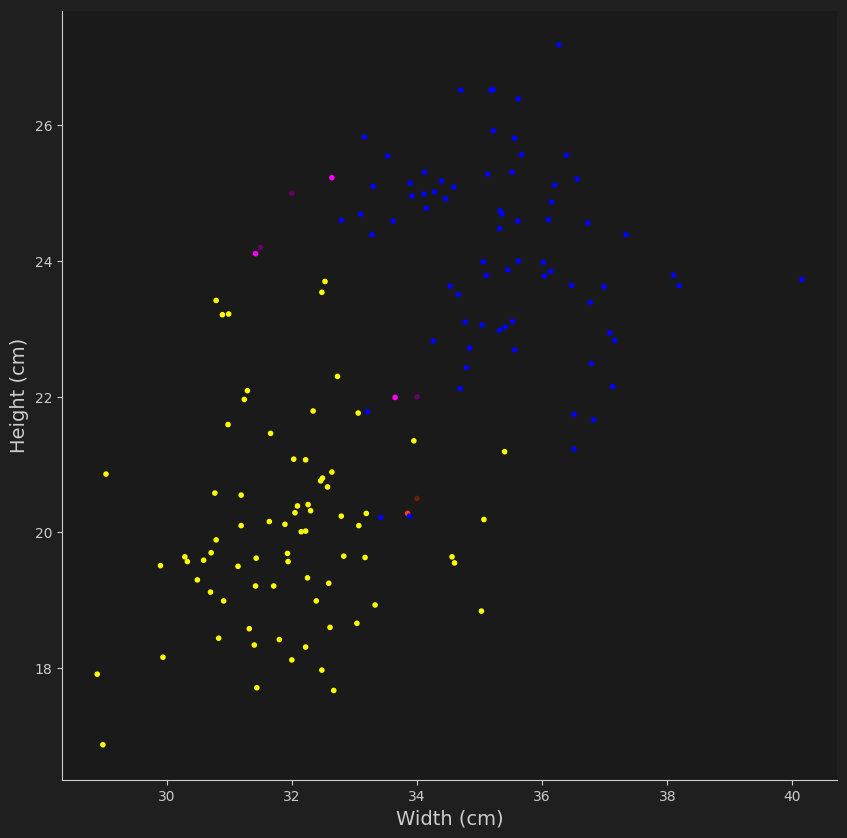

In [231]:
# V2
import matplotlib.pyplot as plt 
import numpy as np
import re


width = list()
height = list()
label = list()
wh = list()

creature = dict()
creature_test = dict()

# Reads the file line by line, and sorts width and height in to a dictionary
# The euclidean distance is calculated and added for each pokemon 
# And last the label is converted in to colors
# Enumerate is used to skip the first Header row in the txt file
with open("datapoints.txt", "r") as file:
    
    for n, e in enumerate(file.readlines()):
        if n == 0:
            continue
        line = e.split(", ")
        width = round(float(line[0]), 2)
        height = round(float(line[1]), 2)
        creature[n-1] = { 
            "width": width, 
            "height": height, 
            "eucli": np.sqrt(width**2 + height**2),
            "label": "#0000ff" if int(line[2][:-1]) else "#ffff00"
            }


creature_test = dict()
length = len(creature)
with open("testpoints.txt", "r") as file:
    for n, line in enumerate(file.readlines()):
        if n == 0:
            continue
        # Use list comprehension to modify each captured group with round and float before assignment
        weidth, height = [ round(float(e), 2) for e in re.search(r"\((.*), (.*)\)", line).group(1,2) ]
        
        creature_test[n+length-1] = { 
        "width": weidth,
        "height": height,
        "eucli": np.sqrt(height**2 + weidth**2) ,
        "label": (0.2+(n*0.2),0.2+(n*0.2),0.2+(n*0.2))
        }

# Combines the two lists so that all creatures are displayed in the scatter plot
# creature.update( creature_test )



# Create a list with the elements of creature sorted in order of euclidean distance value
# to make the search for nerest neighbour simpler and quicker
creature_order = sorted(creature, key=lambda x: creature[x]["eucli"] )

def label(creature_new):
    past=str()
    for e in creature_new:
        for f in creature_order:
            if creature[f]["eucli"] < creature_new[e]["eucli"]:
                past = f
                continue
            else:
                if creature_new[e]["eucli"]-creature[past]["eucli"] < abs(creature_new[e]["eucli"] - creature[f]["eucli"]):
                    creature_new[e]["label"] == creature[past]["label"]
                else: 
                    creature_new[e]["label"] == creature[f]["label"]
    return creature_new 
#creature_test = label(creature_test)

#creature.update( creature_test )

def calculate_closest_neighbour(new_point,points):
    #print(new_point)
    closest_point = { "distance":100, "key":0 }
    npw = new_point["width"]
    nph = new_point["height"]
    for key in points.keys():
        pw = points[key]["width"]
        ph = points[key]["height"]  
        distance = np.sqrt( (npw - pw)**2 + (nph - ph)**2 ) 
        if distance < closest_point["distance"]:
            closest_point["distance"] = distance
            closest_point["key"] = key
    return closest_point["key"]

for e in creature_test.values():
    key = calculate_closest_neighbour(e,creature)
    label = creature[key]["label"]
    if label == "#0000ff":
        creature[key]["label"] = "#ff00ff"
        e["label"] = "#660066"
    else: 
        creature[key]["label"] = "#ff4400"
        e["label"] = "#662200"

creature.update( creature_test )

def user_input(message:str)->int:
    user_input = input(message) 
    while not user_input.isnumeric() :
        user_input = input(f"Your input is not valid, pleas input a whole positive numeric value\n{message}") 
    return int(user_input)

def evaluator(data):
    return "pickachu" if round(np.sqrt(data[0]**2 + data[1]**2), 2) >= median else "pichu"

#print( f"The pokemon is a { evaluator( (user_input('Input height: '), user_input('Input width:')) ) }" )





fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)


ax.set_facecolor((0.1, 0.1, 0.1))
ax.tick_params(axis='x', colors=(0.8, 0.8, 0.8))
ax.tick_params(axis='y', colors=(0.8, 0.8, 0.8))
ax.yaxis.label.set_color((0.8, 0.8, 0.8))
ax.xaxis.label.set_color((0.8, 0.8, 0.8))
ax.spines['bottom'].set_color((0.8, 0.8, 0.8))
ax.spines['left'].set_color((0.8, 0.8, 0.8))
ax.spines['top'].set_color((0.12, 0.12, 0.12))
ax.spines['right'].set_color((0.12, 0.12, 0.12))
fig.set_facecolor((0.12, 0.12, 0.12))

#plt.grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))

plt.scatter([creature[e]["height"] for e in creature], [creature[e]["width"] for e in creature], color=[creature[e]["label"] for e in creature], marker=".", zorder=2)
plt.ylabel("Height (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
plt.xlabel("Width (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
plt.show()

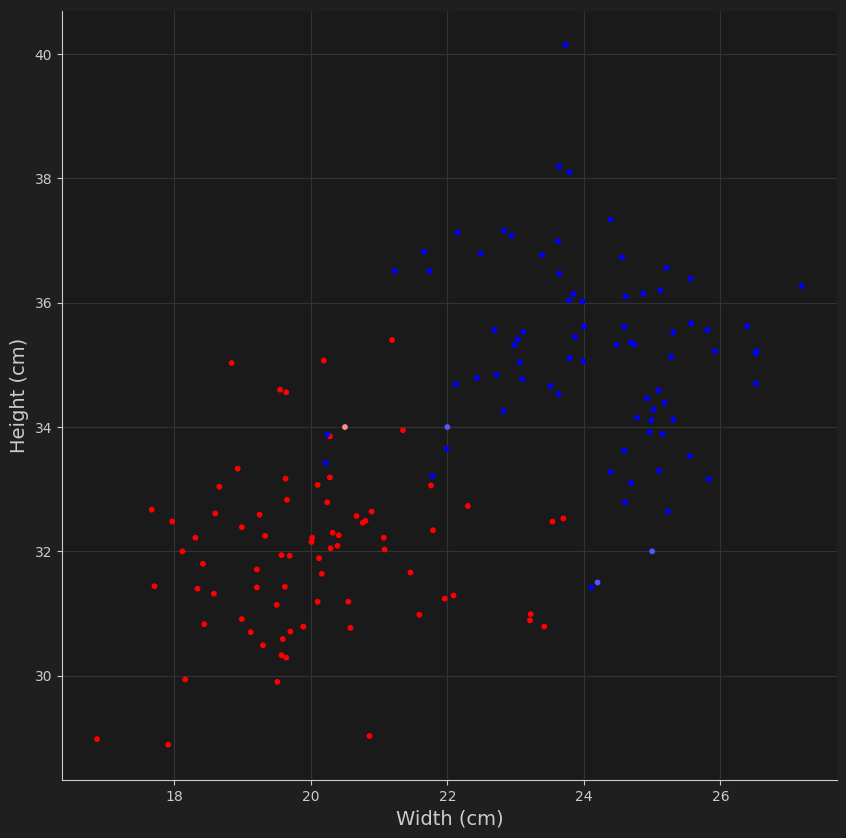

In [70]:
# V3

import matplotlib.pyplot as plt 
import numpy as np
import re


width = list()
height = list()
label = list()
wh = list()

creature = dict()
creature_test = dict()
creature_devided = dict()
creature_devided_test = dict()  

# Reads the file line by line, and sorts width and height in to a dictionary
# The euclidean distance is calculated and added for each pokemon 
# And last the label is converted in to colors
# Enumerate is used to skip the first Header row in the txt file
with open("datapoints.txt", "r") as file:
    
    for n, e in enumerate(file.readlines()):
        if n == 0:
            continue
        line = e.split(", ")
        width = round(float(line[0]), 2)
        height = round(float(line[1]), 2)
        creature[n-1] = { 
            "height": height, 
            "width": width, 
            "label": "pikachu" if int(line[2][:-1]) else "pichu", 
            "color": "#0000ff" if int(line[2][:-1]) else "#ff0000",
            "marker_size": 40
            }



creature_test = dict()
length = len(creature)
with open("testpoints.txt", "r") as file:
    for n, line in enumerate(file.readlines()):
        if n == 0:
            continue
        # Use list comprehension to modify each captured group with round and float before assignment
        weidth, height = [ round(float(e), 2) for e in re.search(r"\((.*), (.*)\)", line).group(1,2) ]
        
        creature_test[n+length-1] = { 
        "height": height,
        "width": weidth,
        "label": "unknown",
        "color": "#ffffff",
        "marker_size": 40
        }


# Test user input
def user_input(message:str)->float:
    user_input = input(message) 
    while not user_input.replace(".","").isnumeric() :
        user_input = input(f"Your input is not valid, pleas input a positive number that is either whole or decimal\n{message}") 
    return float(user_input)

# Allows users to add new unknwon pokemon to creature_test
def add_creature():
    length = len(creature)+len(creature_test)
    return { 
        length : { 
            "height": user_input("Input height:"), 
            "width": user_input("Input width:"), 
            "label": "unkown", 
            "color": "#ffffff",
            "marker_size": 40
                }
            }
    
#creature_test.update(add_creature())



def closest_neighbour(new_point,points):
    # print(new_point)
    closest_point = { "distance":1000, "key":0 }
    npw = new_point["width"]
    nph = new_point["height"]
    for key in points.keys():
        pw = points[key]["width"]
        ph = points[key]["height"]  
        distance = np.sqrt( (npw - pw)**2 + (nph - ph)**2 ) 
        if distance < closest_point["distance"]:
            closest_point["distance"] = distance
            closest_point["key"] = key
    return closest_point["key"]

def euclidean_sort(x, new_point, points):
    npw = new_point["width"]
    nph = new_point["height"]
    pw = points[x]["width"]
    ph = points[x]["height"]
    return np.sqrt( (npw - pw)**2 + (nph - ph)**2 ) 

def closest_majority(new_point,points):
    liz = sorted(points, key=lambda e: euclidean_sort(e, new_point, points ) )[:10]
    pikachu = pichu = 0
    [ (pikachu:=pikachu+1) if points[val]["label"] == "pikachu" else (pichu:=pichu+1) for val in liz ]
    #print(f"{new_point=}")
    #new_point["lable"] = "pikachu"
    #creature_test[150]["lable"] = "pikachu"
    return ("pikachu", "#5555ff" ) if pikachu >= pichu else ("pichu", "#ff8888")
       
    
    #for e in liz:
        #points[e]["color"]="Purple"


for key, val in creature_test.items():
    creature_test[key]["label"], creature_test[key]["color"] = closest_majority(val, creature)

def color_closest_neighbour():
    for e in creature_test.values():
        key = closest_neighbour(e,creature)
        label = creature[key]["label"]
        if label == "pikachu":
            creature[key]["color"] = "#5555ff"
            e["color"] = "#5555ff"
            e["marker_size"] = 160
            e["label"] = "pikachu"
        else: 
            creature[key]["color"] = "#ff8888"
            e["color"] = "#ff8888"
            e["marker_size"] = 160
            e["label"] = "pichu"
#color_closest_neighbour()

# Combines the two lists so that all creatures are displayed in the scatter plot
creature.update( creature_test )







fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)


ax.set_facecolor((0.1, 0.1, 0.1))
ax.tick_params(axis='x', colors=(0.8, 0.8, 0.8))
ax.tick_params(axis='y', colors=(0.8, 0.8, 0.8))
ax.yaxis.label.set_color((0.8, 0.8, 0.8))
ax.xaxis.label.set_color((0.8, 0.8, 0.8))
ax.spines['bottom'].set_color((0.8, 0.8, 0.8))
ax.spines['left'].set_color((0.8, 0.8, 0.8))
ax.spines['top'].set_color((0.12, 0.12, 0.12))
ax.spines['right'].set_color((0.12, 0.12, 0.12))
fig.set_facecolor((0.12, 0.12, 0.12))

plt.grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))

plt.scatter([creature[e]["width"] for e in creature], [creature[e]["height"] for e in creature], color=[creature[e]["color"] for e in creature], marker=".", s=[creature[e]['marker_size']for e in creature], zorder=2)
plt.ylabel("Height (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
plt.xlabel("Width (cm)", fontsize=14, color=(0.8, 0.8, 0.8))
plt.show()

In [31]:

with open("datapoints.txt", "r") as file:
    next(file)
    for line in file.readlines():
        width, height, label = line.strip().split(", ")

#for e in ["20, 30, 1", "20, 30, 2"]:
#    width, height, label = e.strip().split(", ")

k = dict(a=1, b=2, c=3 )
print(len(k))

3


In [124]:
# V4
from random import shuffle 



def read_data():
    with open("datapoints.txt", "r") as file:
        next(file)
        for n, e in enumerate(file.readlines()):
            line = e.split(", ")
            label = "pikachu" if int(line[2][:-1]) else "pichu"
            creature[label].append(  { 
                "height": round(float(line[1]), 2),
                "width": round(float(line[0]), 2),
                "label": label,
                "guesse": None,
                #"color": "#0000ff" if int(line[2][:-1]) else "#ff0000",
                #"marker_size": 40
                } )

def shuffle_data():
    shuffle(creature["pikachu"])
    shuffle(creature["pichu"])
    creature_divided = creature["pikachu"][:50] + creature["pichu"][:50]
    creature_divided_test = creature["pikachu"][50:] + creature["pichu"][50:]
    # Need to shuffle it one more time because if the points are tide then it 
    # will chose the FIRST closest point and because all pikachus are added before
    # the pichus the pikachus will always be chosen before the pichus
    shuffle(creature_divided)


#print(creature_divided_test)

def euclidean_sort(labeld_point, test_point, ):
   # print(labeld_point)
    tpw = test_point["width"]
    tph = test_point["height"]
    lpw = labeld_point["width"]
    lph = labeld_point["height"]
    return np.sqrt( (tpw - lpw)**2 + (tph - lph)**2 ) 
  

def closest_majority(points_test, points):
    
    for key, test_point in enumerate(points_test):       
        # Sorts the point list based on euclidean distance and save them in a list
        closest_points = sorted(points, key=lambda labeled_point: euclidean_sort(labeled_point, test_point) )[:10]
        # Counts the number of points that are pikachu res pichu in the list
        pikachu = pichu = 0
        [ (pikachu:=pikachu+1) if point["label"] == "pikachu" else (pichu:=pichu+1) for point in closest_points ]
        # Sets the label ro pikachu / pichu based on majority, if equal then picks based on the first closest point
        if pikachu > pichu:
            points_test[key]["guess"] = "pikachu"
        elif pichu < pikachu:
            points_test[key]["guess"] = "pichu"
        else:
            points_test[key]["guess"] = closest_points[0]["label"]
    return points_test
    





def evaluation(creature_divided_test, accuracy_data):
    for obj in creature_divided_test:
        if obj["label"] == "pikachu" and obj["guess"] == "pikachu":
            accuracy_data["tp"] += 1 
        elif obj["label"] == "pichu" and obj["guess"] == "pichu":
            accuracy_data["tn"] += 1
        elif obj["label"] == "pikachu" and obj["guess"] == "pichu":
            accuracy_data["fp"] += 1
        elif obj["label"] == "pichu" and obj["guess"] == "pikachu":
            accuracy_data["fn"] += 1     

    return accuracy_data



def main():
    creature = { "pikachu":list(), "pichu":list() }
    creature_divided = dict()
    creature_divided_test = dict()  
    accuracy_data = dict( tp=0, tn=0, fp=0, fn=0 )

    read_data()
    shuffle_data()
    creature_divided_test = closest_majority(creature_divided_test, creature_divided)
    accuracy_data = evaluation(creature_divided_test, accuracy_data) 

        
    #for e in creature_divided_test:
        #print(f"True:{e["label"]} | Guess:{e["guess"]}")
    #print(accuracy_data)

main()

True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pichu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pikachu | Guess:pikachu
True:pichu | Guess:pikachu
True:pichu | Guess:pichu
True:pichu | Guess:pichu
True:pichu | Guess:pichu
True:pichu | Guess:pikachu
True:pichu | Guess:pichu
True:pichu | Guess:pichu
True:pichu | Guess:pichu
True:pichu | Guess:pikachu
True:pichu | Guess:pichu
True:pichu | Guess:pi